In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import plotly.offline as po
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

import os
print(os.listdir('../input/'))

['amazon-alexa-reviews']


In [3]:
data = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter='\t')

data.shape
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [7]:
data['len_reviews'] = data['verified_reviews'].apply(len)
data.groupby('len_reviews').describe().sample(10)

rating                                                feedback  \
             count      mean       std  min   25%  50%   75%  max    count   
len_reviews                                                                  
32            23.0  4.521739  1.162660  1.0  5.00  5.0  5.00  5.0     23.0   
827            1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
296            2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
169            6.0  4.166667  1.169045  2.0  4.00  4.5  5.00  5.0      6.0   
244            1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0   
131            9.0  4.333333  1.322876  1.0  4.00  5.0  5.00  5.0      9.0   
861            1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
823            1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
259            4.0  4.750000  0.500000  4.0  4.75  5.0  5.00  5.0      4.0   
121            7.0  4.857143  0.377964  4.0  5.00  5.0  5.00  5.0      7.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
len_reviews                                               
32           0.913043  0.288104  0.0  1.0  1.0  1.0  1.0  
827          0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
296          1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
169          0.833333  0.408248  0.0  1.0  1.0  1.0  1.0  
244          0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
131          0.888889  0.333333  0.0  1.0  1.0  1.0  1.0  
861          1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
823          1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
259          1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
121          1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

In [8]:
data.groupby('rating').describe()

feedback                                    len_reviews              \
          count mean  std  min  25%  50%  75%  max       count        mean   
rating                                                                       
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [9]:
data.groupby('feedback').describe()

rating                                              len_reviews  \
           count      mean       std  min  25%  50%  75%  max       count   
feedback                                                                    
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0       257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0      2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

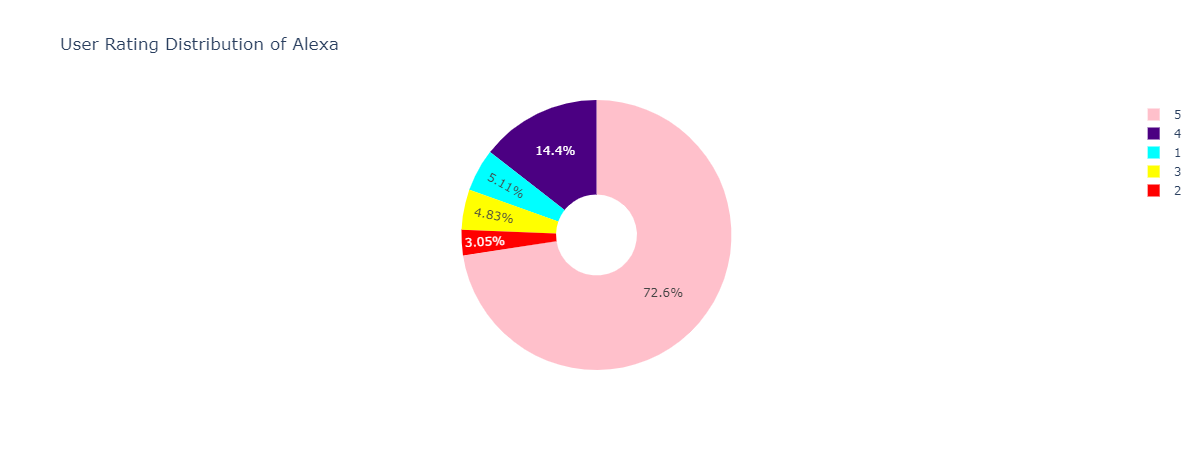

In [10]:
total_ratings = data['rating'].value_counts()

idx_rating = total_ratings.index
val_rating = total_ratings.values

color_palette = ['pink', 'indigo', 'cyan','yellow','red']

vizby_pie = go.Pie(labels=idx_rating,
                  values = val_rating,
                  marker= dict(colors = color_palette ),
                  name='ALEXA', hole= 0.3)

df = [vizby_pie]

layout = go.Layout(title = 'User Rating Distribution of Alexa')

fig = go.Figure(data=df, layout = layout)

po.iplot(fig)

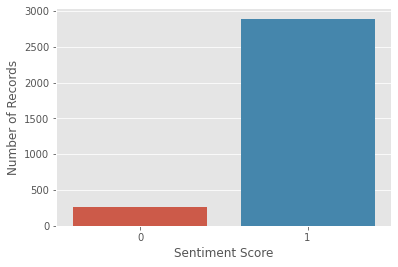

In [11]:
sns.countplot(x='feedback', data=data)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')
plt.show()

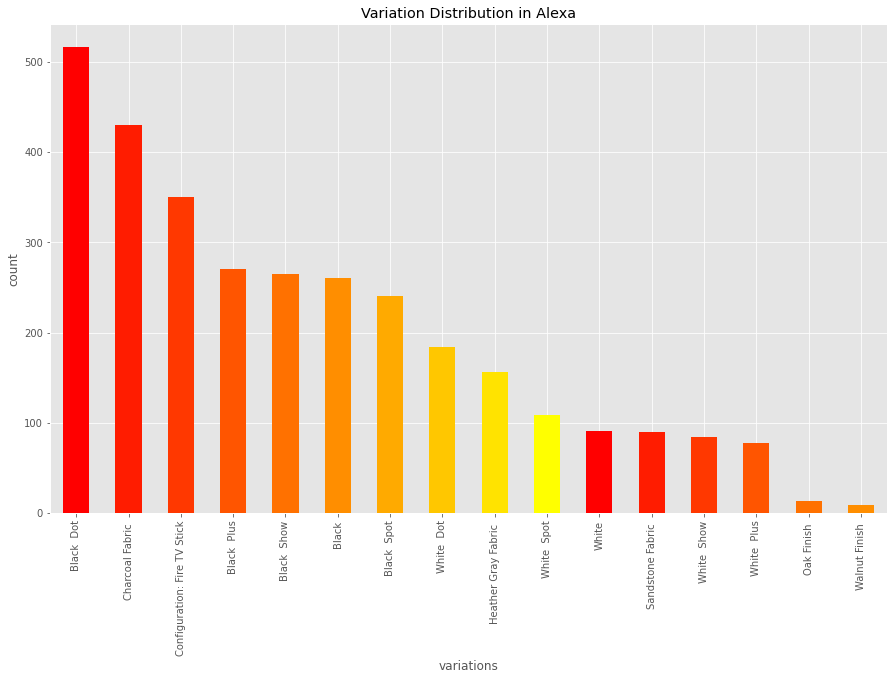

In [12]:
c = plt.cm.autumn(np.linspace(0,1,10))
data['variation'].value_counts().plot(kind='bar',color=c, figsize=(15,9))
plt.style.use(['dark_background'])
plt.title('Variation Distribution in Alexa')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

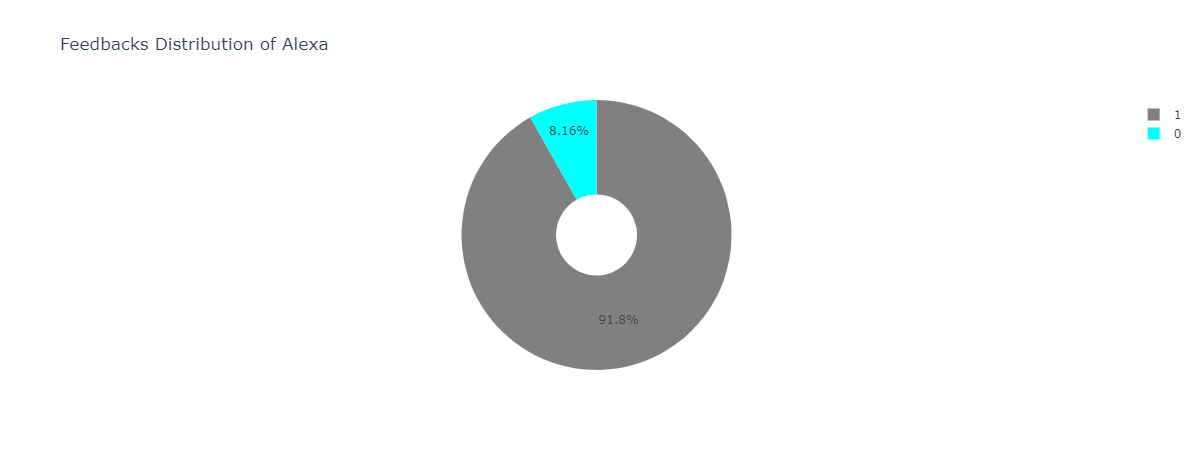

In [13]:
feedbacks = data['feedback'].value_counts()

idx_feedback = feedbacks.index
val_feedback = feedbacks.values

c1 = ['grey', 'cyan']

viz_feedbpie = go.Pie(labels=idx_feedback,
                     values = val_feedback,
                     marker = dict(colors = c1),
                     name='Alexa', hole=0.3)

df2 = [viz_feedbpie]

layout1 = go.Layout(
           title = 'Feedbacks Distribution of Alexa')

fig1 = go.Figure(data = df2,
                 layout = layout1)

po.iplot(fig1)

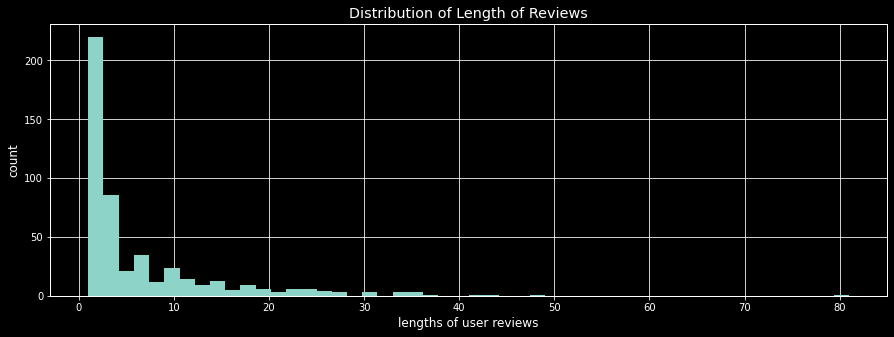

In [14]:
data['len_reviews'].value_counts().plot(kind='hist', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length of Reviews')
plt.xlabel('lengths of user reviews')
plt.ylabel('count')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



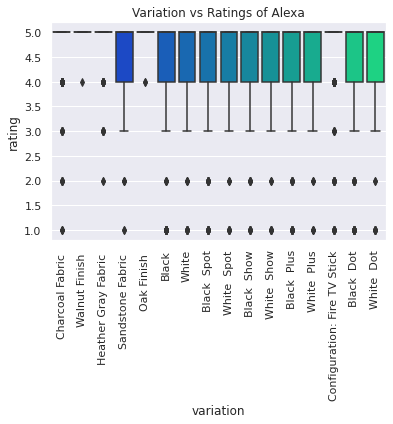

In [15]:
plt.style.use('fast')
sns.set_theme(style="darkgrid")
#plt.style.use(['dark_background'])
sns.boxplot(data['variation'], data['rating'], palette = "winter")
plt.title("Variation vs Ratings of Alexa")
plt.xticks(rotation = 90)
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



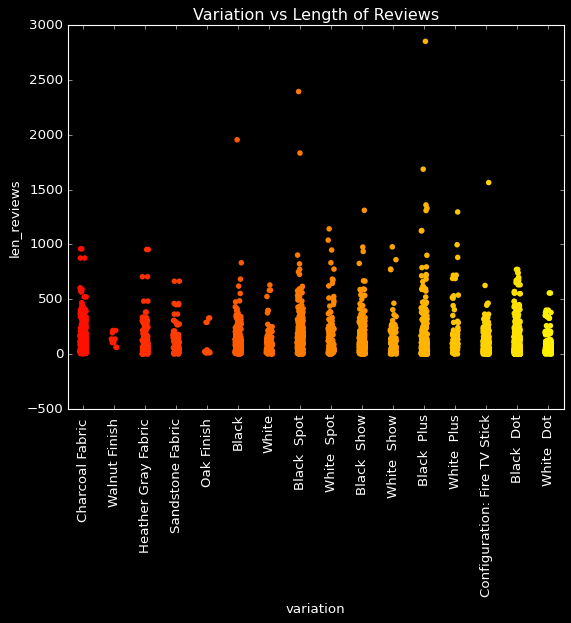

In [16]:
plt.style.use('classic')
plt.style.use(['dark_background'])
sns.stripplot(data['variation'], data['len_reviews'], palette = 'autumn')
plt.title("Variation vs Length of Reviews")
plt.xticks(rotation = 90)
plt.show()

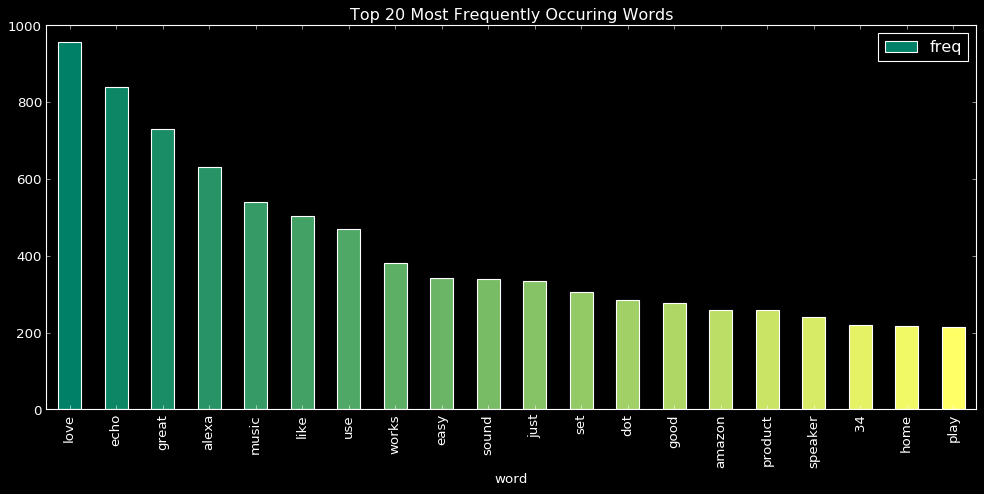

In [17]:
#MOST FREQUENTLY OCCURRENCE WORD
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['verified_reviews'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
fqn = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('_classic_test_patch')
c2 = plt.cm.summer(np.linspace(0, 1, 20))

fqn.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = c2)
plt.style.use(['dark_background'])
plt.title("Top 20 Most Frequently Occuring Words")
plt.show()

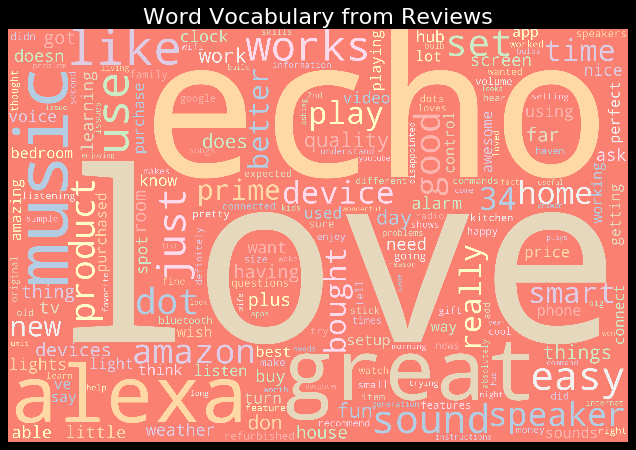

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='salmon',mode='RGB',
                      width = 3000, height = 2000,
                     colormap='Pastel1').generate_from_frequencies(dict(words_freq))

plt.style.use('bmh')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Word Vocabulary from Reviews", fontsize = 20)
plt.show()

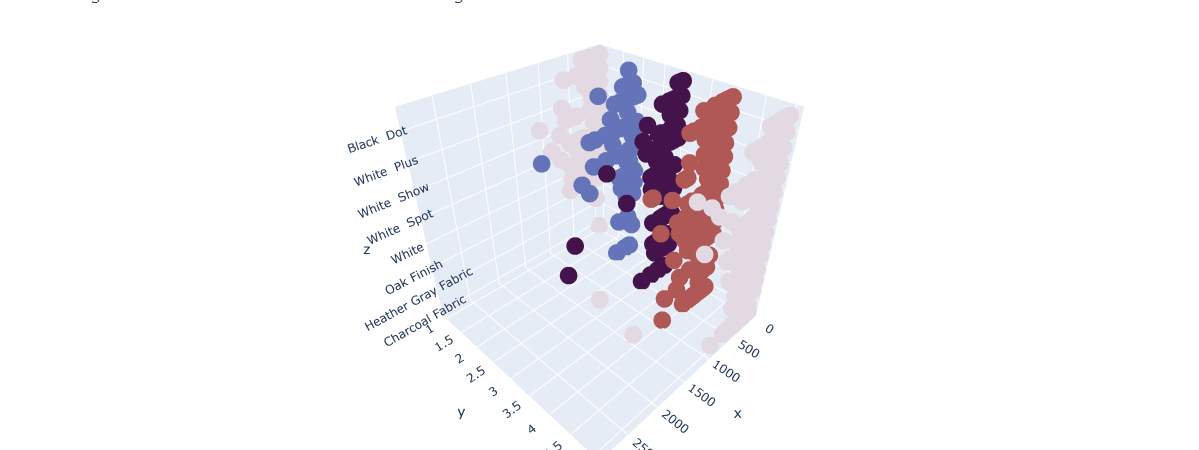

In [19]:
trace3d = go.Scatter3d(x = data['len_reviews'],
                      y = data['rating'],
                      z = data['variation'],
                      name = 'Amazon Alexa',
                      mode='markers',
                      marker= dict(size =10,
                                  color= data['rating'],
                                  colorscale= 'twilight'))
df3 = [trace3d]

layout2 = go.Layout(
    title = 'Length of Reviews Vs Variations Vs User Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig2 = go.Figure(data = df3, layout = 
                layout2)
iplot(fig2)

In [20]:
import spacy
nlp = spacy.load('en')

def text_entities(text):
    doc = nlp(text)
    for entity in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15,50):
    sentence = data['verified_reviews'][i]
    doc = nlp(sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/opt/conda/lib/python3.7/site-packages/spacy/displacy/__init__.py:189: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [21]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

print("Carry on!")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Carry on!


In [22]:
corpus= []

for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', '', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ''.join(review)
    corpus.append(review)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

x = tfidf_vec.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2234)
(3150,)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2234)
(2205,)
(945, 2234)
(945,)


In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()


x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [26]:
'''----RANDOM FOREST CLASSIFIER-----

confusion matrix details - 
1.True Positive (TP): It refers to the number of predictions where 
the classifier correctly predicts the positive class as positive.
2.True Negative (TN): It refers to the number of predictions where 
the classifier correctly predicts the negative class as negative.
3.False Positive (FP): It refers to the number of predictions where 
the classifier incorrectly predicts the negative class as positive.
4.False Negative (FN): It refers to the number of predictions where 
the classifier incorrectly predicts the positive class as negative.
conf matx-
TP FP
FN TN
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

c_matx = confusion_matrix(y_test, y_pred)
print(c_matx)

Training Accuracy : 0.9945578231292517
Testing Accuracy : 0.9343915343915344
[[ 13  62]
 [  0 870]]


In [27]:
''' K FOLD CROSS VALIDATION '''

from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(estimator= model, X = x_train, y= y_train, cv=10)

print("Accuracy: ", accuracy_scores.mean())

print("Standard Deviation: ", accuracy_scores.std())

Accuracy:  0.9301604278074865
Standard Deviation:  0.006768020348261219


In [28]:
''' GRID SEARCH WITH STRATIFIED K FOLD '''

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}
grid = GridSearchCV(estimator = model, 
                    param_grid = params, 
                    cv = StratifiedKFold(n_splits = 2),
                    verbose = 0, 
                    return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [29]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [30]:
print("Mean Cross Val Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Val Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Val Accuracy - Train Set : 95.70863389403262
Mean Cross Val Accuracy - Validation Set : 92.08616617277085
Accuracy Score for Test Set : 0.9343915343915344
